<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter7/QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 7.3
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.random import rand
from numpy.linalg import inv, det
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(1357)

## Original Program

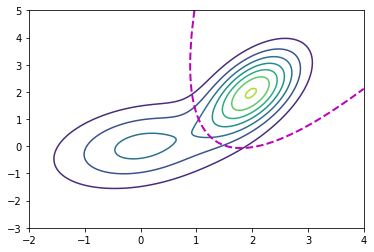

In [4]:
mu1 = np.array([0,0])
mu2 = np.array([2,2])
Sigma1 = np.array([[1,0.3],[0.3, 1]])
Sigma2 = np.array([[0.3,0.3],[0.3, 1]])
x, y = np.mgrid[-2:4:150j,-3:5:150j]
mvn1 = multivariate_normal( mu1, Sigma1 )
mvn2 = multivariate_normal( mu2, Sigma2 )

xy = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
z = 0.5*mvn1.pdf(xy).reshape(x.shape) +  0.5*mvn2.pdf(xy).reshape(x.shape)
plt.contour(x,y,z)

z1 = 0.5*mvn1.pdf(xy).reshape(x.shape) -  0.5*mvn2.pdf(xy).reshape(x.shape)
plt.contour(x,y,z1, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'm')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.savefig('QDApy.pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Add 3rd Gaussian

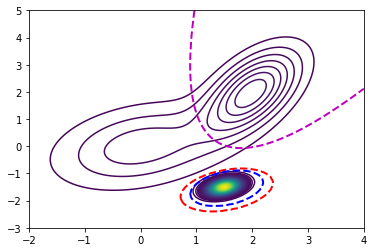

In [5]:
mu3 = np.array([1.5,-1.5])
Sigma3 = np.array([[0.03,0.01],[0.01, 0.03]])
mvn3 = multivariate_normal( mu3, Sigma3 )

xy = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
z = 0.333*mvn1.pdf(xy).reshape(x.shape) +  0.333*mvn2.pdf(xy).reshape(x.shape) + 0.333*mvn3.pdf(xy).reshape(x.shape)
plt.contour(x,y,z, 150)

z12 = 0.3*mvn1.pdf(xy).reshape(x.shape) -  0.3*mvn2.pdf(xy).reshape(x.shape)
plt.contour(x,y,z12, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'm')

z23 = 0.3*mvn2.pdf(xy).reshape(x.shape) -  0.3*mvn3.pdf(xy).reshape(x.shape)
plt.contour(x,y,z23, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'r')

z31 = 0.3*mvn3.pdf(xy).reshape(x.shape) -  0.3*mvn1.pdf(xy).reshape(x.shape)
plt.contour(x,y,z31, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'b')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.savefig('QDApy.pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

[-0.05665438 -0.04349617]
[1.98602748 1.95253759]
[ 1.49886242 -1.49985278]


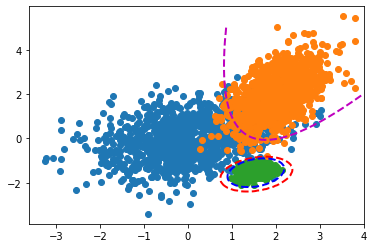

In [6]:
#plt.contour(x,y,z, 150)
M = 1000
X1 = np.random.multivariate_normal(mu1,Sigma1,M)
X2 = np.random.multivariate_normal(mu2,Sigma2,M)
X3 = np.random.multivariate_normal(mu3,Sigma3,M)

plt.scatter(X1.T[0], X1.T[1])
plt.scatter(X2.T[0], X2.T[1])
plt.scatter(X3.T[0], X3.T[1])
Mu_bar1 = np.mean(X1,axis=0)
Mu_bar2 = np.mean(X2,axis=0)
Mu_bar3 = np.mean(X3,axis=0)
Sigma_bar1 = np.cov(X1.T)
Sigma_bar2 = np.cov(X2.T)
Sigma_bar3 = np.cov(X3.T)
print(Mu_bar1)
print(Mu_bar2)
print(Mu_bar3)
mvnBar1 = multivariate_normal( Mu_bar1, Sigma_bar1 )
mvnBar2 = multivariate_normal( Mu_bar2, Sigma_bar2 )
mvnBar3 = multivariate_normal( Mu_bar3, Sigma_bar3 )

z12 = mvnBar1.pdf(xy).reshape(x.shape) -  mvnBar2.pdf(xy).reshape(x.shape)
plt.contour(x,y,z12, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'm')

z23 = mvnBar2.pdf(xy).reshape(x.shape) -  mvnBar3.pdf(xy).reshape(x.shape)
plt.contour(x,y,z23, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'r')

z31 = mvnBar3.pdf(xy).reshape(x.shape) -  mvnBar1.pdf(xy).reshape(x.shape)
plt.contour(x,y,z31, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'b')
plt.show()